
# 2 - Data exploration


In [1]:
# import parameters
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

## 2.1 Incidents data overview

In [2]:
incidents = pd.read_excel('../data/incidents_2019-08-09/hl2010toPresent.xlsx', 
                          sheet_name=1)

incidents.sample(5)

,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,IPE,IA_IPE,OM_IPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
2638,2019-07-31 08:37:40,NO,NO,YES,NO,YES,20160305,23149,2016-09-19 11:52:42,SUPPLEMENTAL FINAL,...,COMPLIANCE COORDINATOR SED,djohnson2@colpipe.com,770-819-3574,NaN,2018-02-16,JONATHAN B BERNHARDT,MANAGER PIPELINE COMPLIANCE,678-762-2203,jbernhardt@colpipe.com,"ON AUGUST 23, 2016 AT 1800, A MAINTENANCE CREW..."
965,2019-07-31 08:37:40,YES,NO,YES,YES,NO,20120311,20151,2012-10-26 12:00:29,SUPPLEMENTAL FINAL,...,COMPLIANCE COORDINATOR,nfurgerson@colpipe.com,404-807-3822,NaN,2015-02-20,DREW LOHOFF,MANGER PHMSA REGULATORY COMPLIANCE,678-762-2872,dlohoff@colpipe.com,"ON OCTOBER 3, AT 1440 EST, A LANDOWNER CALLED..."
2502,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20160168,21879,2016-06-03 11:20:36,SUPPLEMENTAL FINAL,...,MI ENGINEER - PIPING,connie.christian@crc.com,562-277-5099,562-624-3499,2016-11-21,CHARLIE PLANT,VP OPERATIONS,562-624-3202,charlie.plant@crc.com,"ON THURSDAY, MAY 5TH AT APPROXIMATELY 7:20PM, ..."
1190,2019-07-31 08:37:40,YES,NO,YES,NO,YES,20130163,18833,2013-05-07 13:51:16,SUPPLEMENTAL FINAL,...,DOT ADMINISTRATOR',kbrown@expl.com,918-493-5104,NaN,2013-12-17,JIM SIECK,DIRECTOR HSSE AND ENGINEERING,918-493-5143,jsieck@expl.com,"ON APRIL 7, 2013 AT 18:00 HOURS INDICATION OF ..."
2564,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20160230,21545,2016-07-20 16:46:04,ORIGINAL FINAL,...,COMPLIANCE SPECIALIST,crcarter@paalp.com,713-993-5080,713-646-4310,2016-07-20,THOMAS MCLANE,SR DIR ENVIRONMENTAL AND REGULATORY COMPLIANCE,713-646-4109,tjmclane@paalp.com,APPROXIMATELY 1 BBL OF CRUDE OIL WAS RELEASED ...


In [3]:
incidents['NAME'].value_counts().head(10)

ENTERPRISE CRUDE PIPELINE LLC          276
ENTERPRISE PRODUCTS OPERATING LLC      214
SUNOCO PIPELINE L.P.                   211
PLAINS PIPELINE, L.P.                  203
MAGELLAN PIPELINE COMPANY, LP          180
COLONIAL PIPELINE CO                   177
BUCKEYE PARTNERS, LP                   148
PHILLIPS 66 PIPELINE LLC               121
KINDER MORGAN LIQUID TERMINALS, LLC    117
MARATHON PIPE LINE LLC                 111
Name: NAME, dtype: int64

In [4]:
incidents['OPERATOR_ID'].value_counts().head(10)

30829    282
31618    214
18718    211
300      202
22610    180
2552     177
31684    155
1845     148
26041    117
32109    112
Name: OPERATOR_ID, dtype: int64

There seem to be some minor discrepancies between ID and name. Matching every ID to its most common company name should fix it. 

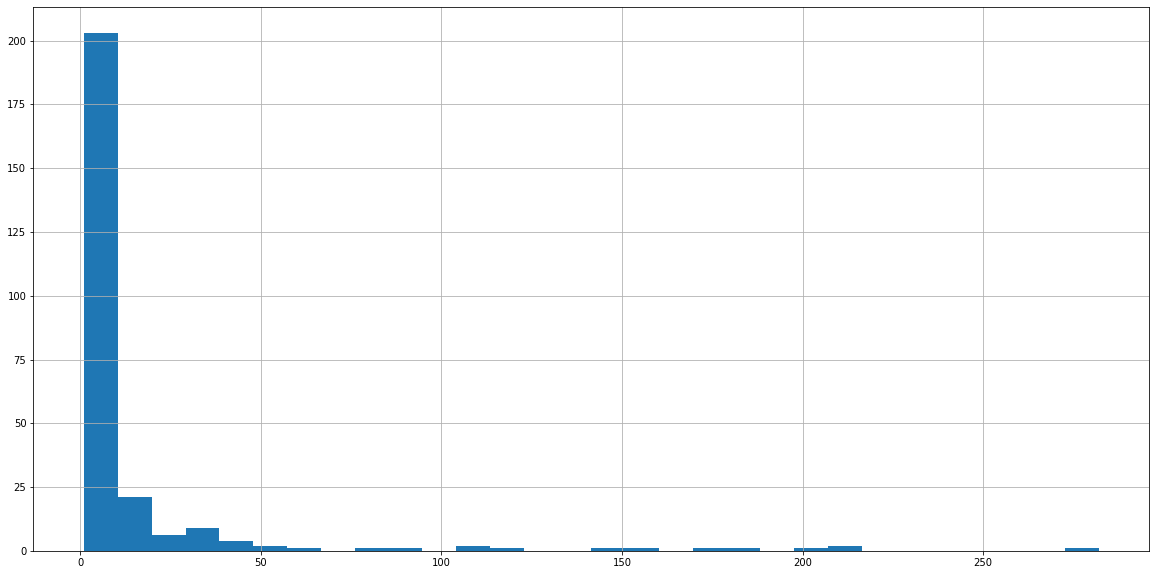

In [5]:
incidents['OPERATOR_ID'].value_counts().hist(bins=30, figsize=(20, 10))

In [6]:
len(incidents)

3819

## 2.2 Oil pipeline data

In [7]:
oil_pipelines = pd.read_excel('../data/pipelines_2010_present_2019-08-09/annual_hazardous_liquid_2010.xlsx', skiprows=2)

oil_pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
270,2019-08-01 13:10:42,2010,20110171,10173,31454,"NUSTAR LOGISTICS, L.P.",2330 North Loop 1604 W,Corpus Christi,TX,78248,...,0.0,0.0,0.0,455.70,418.0,37.70,INITIAL,2011-08-12 17:10:53,2011-08-12 17:10:53,7000-1.1 (Rev. 06-2011)
13,2019-08-01 13:10:42,2010,20110105,10106,1248,BELLE FOURCHE PIPELINE CO,PO Drawer 2360,CASPER,WY,82602,...,0.0,0.0,0.0,486.00,299.0,187.00,INITIAL,2011-08-11 15:00:01,2011-08-11 15:00:01,7000-1.1 (Rev. 06-2011)
2,2019-08-01 13:10:42,2010,20110192,10194,395,AMOCO OIL CO,150 W. Warrenville Rd,OAKBROOK TERRACE,IL,60563,...,0.0,0.0,0.0,220.00,93.0,127.00,INITIAL,2011-08-13 16:22:01,2011-08-13 16:22:01,7000-1.1 (Rev. 06-2011)
492,2019-08-01 13:10:42,2010,20130537,12507,99043,PETROLEUM FUEL AND TERMINAL COMPANY,5101 ERDMAN AVE,BALTIMORE,MD,21205,...,0.0,0.0,0.0,3.14,0.0,3.14,SUPPLEMENTAL,2013-11-19 16:31:09,2013-11-19 16:36:58,7000-1.1 (Rev. 06-2011)
223,2019-08-01 13:10:42,2010,20120475,11565,31082,KEY PIPELINE LIMITED,917 N. Dumas Ave.,Dumas,TX,79029,...,0.0,0.0,0.0,17.00,0.0,17.00,INITIAL,2012-08-22 15:05:38,2012-08-22 15:05:38,7000-1.1 (Rev. 06-2011)


In [8]:
from os import listdir

pipeline_files = [file for file in listdir('../data/pipelines_2010_present_2019-08-09/') if'annual_hazardous_liquid' in file]
pipeline_files

['annual_hazardous_liquid_2017.xlsx',
 'annual_hazardous_liquid_2011.xlsx',
 'annual_hazardous_liquid_2014.xlsx',
 'annual_hazardous_liquid_2012.xlsx',
 'annual_hazardous_liquid_2013.xlsx',
 'annual_hazardous_liquid_2010.xlsx',
 'annual_hazardous_liquid_2018.xlsx',
 'annual_hazardous_liquid_2016.xlsx',
 'annual_hazardous_liquid_2015.xlsx']

In [9]:
pipelines = pd.concat([pd.read_excel(f'../data/pipelines_2010_present_2019-08-09/{file}', skiprows=2) for file in pipeline_files])
pipelines = pipelines.reset_index(drop = True)

pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
1973,2019-08-01 13:19:08,2012,20130174,12424,30829,ENTERPRISE CRUDE PIPELINE LLC,1100 Louisiana Street,Houston,TX,77002,...,39.238,0.0,39.238,194.785,168.214,26.571,SUPPLEMENTAL,2013-06-07 10:12:54,2013-08-06 11:18:31,7000-1.1 (Rev. 06-2011)
999,2019-08-01 13:14:22,2011,20120503,11621,31806,"LINN WESTERN OPERATING, INC",2000 Tonner Canyon Road,BREA,CA,92821,...,0.000,0.0,0.000,0.000,0.000,0.000,INITIAL,2012-11-05 11:51:04,2012-11-05 11:51:04,7000-1.1 (Rev. 06-2011)
1422,2019-08-01 13:39:40,2014,20151214,13323,31228,"CALIFORNIA RESOURCES ELK HILLS, LLC",10800 STOCKDALE HWY,BAKERSFIELD,CA,93311,...,0.000,0.0,0.000,0.000,0.000,0.000,INITIAL,2015-05-22 13:57:52,2015-05-22 13:57:52,7000-1.1 (Rev. 06-2014)
565,2019-08-01 13:58:36,2017,20183252,15776,39316,"RENAISSANCE OFFSHORE, LLC",920 MEMORIAL CITY WAY,HOUSTON,TX,77024,...,0.000,0.0,0.000,0.000,0.000,0.000,SUPPLEMENTAL,2018-06-07 16:24:47,2018-06-08 09:32:09,7000-1.1 (Rev. 06-2014)
949,2019-08-01 13:14:22,2011,20120451,11510,31475,TRINITY PIPELINE GP LLC,401 WEST WALL STREET,MIDLAND,TX,79701,...,0.000,0.0,0.000,158.000,158.000,0.000,INITIAL,2012-06-22 18:07:19,2012-06-22 18:07:19,7000-1.1 (Rev. 06-2011)


See which company has the vastest pipeline network.

In [10]:
pipelines.loc[pipelines.groupby('OPERATOR_ID')['PARTBHCATOTAL'].idxmax()].nlargest(10, 'PARTBHCATOTAL')[['REPORT_YEAR', 'OPERATOR_ID', 'PARTA2NAMEOFCOMP', 'PARTBHCATOTAL']]

,REPORT_YEAR,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTBHCATOTAL
3634,2018,31618,ENTERPRISE PRODUCTS OPERATING LLC,7726.183
3704,2018,32109,"ONEOK NGL PIPELINE, LLC",4531.480
4723,2015,2552,COLONIAL PIPELINE CO,4500.920
4715,2015,1845,"BUCKEYE PARTNERS, LP",4266.430
3484,2018,22610,"MAGELLAN PIPELINE COMPANY, LP",3926.400
4135,2016,15674,PLANTATION PIPE LINE CO,2564.730
4035,2016,300,"PLAINS PIPELINE, L.P.",2312.330
67,2017,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",2290.000
3186,2010,31684,CONOCOPHILLIPS,2283.790
2693,2013,32147,MARATHON PIPE LINE LLC,2281.900


## 2.3 Gas pipelines

In [12]:
gas_pipelines = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2015.xlsx', skiprows=1)

gas_pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA2NAMEOFPARENT_COM,PARTA3NAME,PARTA3TITLE,PARTA3EMAIL,...,PARTA4ZIP,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV,PARTNPREPNAME,PARTNPREPTITLE,PARTNPREPEMAIL,PARTNPREPPHONE,PARTNPREPFAX
59,2019-08-01 14:19:07,2015,20160312,583,22777,WISCONSIN ELECTRIC POWER COMPANY DBA WE ENERGIES,WEC Energy Group,Tim Strommen,Manager Gas Code Compliance,tim.strommen@we-energies.com,...,53203,INITIAL,2016-03-09 07:16:53,2016-03-09 07:16:53,7100.3-1 (Rev. 10-2014),Leif Monson,Gas System Senior Analyst,leif.monson@we-energies.com,(414)221-5349,NaN
76,2019-08-01 14:19:07,2015,20160265,529,32648,PIVOTAL LNG INC.,"AGL Resources, Inc.",Ralph McCollum,Sr Compliance Engineer,rmccollu@aglresources.com,...,30309,INITIAL,2016-01-28 08:38:26,2016-01-28 08:38:26,7100.3-1 (Rev. 10-2014),Ralph McCollum,Sr Compliance Engineer,rmccollu@aglresources.com,(404) 584-3733,(404)584-4710
21,2019-08-01 14:19:07,2015,20160281,550,5200,FITCHBURG GAS & ELECTRIC LIGHT CO,Unitil Coporation,Jonathan Pfister,"Manager, Gas Systems Operations",pfister@unitil.com,...,01420,INITIAL,2016-02-22 08:46:58,2016-02-22 08:46:58,7100.3-1 (Rev. 10-2014),Leigh Willett,agent,willettl@unitl.com,(603)777-5509,(603)777-5609
81,2019-08-01 14:19:07,2015,20160295,654,39092,TITAN ALASKA LNG,NaN,Brendan Kern,Engineer,bkern@fngas.com,...,99701,SUPPLEMENTAL,2016-03-02 13:48:24,2017-01-31 16:09:28,7100.3-1 (Rev. 10-2014),Brendan Kern,Operator,bkern@fngas.com,(907)799-0987,NaN
7,2019-08-01 14:19:07,2015,20160314,594,1640,BOSTON GAS CO,National Grid,Eric Hahn/Walter Doucette,"Directors, LNG Mass",Eric.Hahn@NationalGrid.com,...,02451,SUPPLEMENTAL,2016-03-09 11:09:41,2016-03-11 06:58:05,7100.3-1 (Rev. 10-2014),Steve Sechovicz,Principle Engineer,stephen.sechovicz@nationalgrid.com,(617)822-5412,NaN


In [13]:
gas_files = [file for file in listdir('../data/gas_2010_present_2019-08-09/') if'annual_liquefied_natural_gas' in file]
gas_files

['annual_liquefied_natural_gas_2013.xlsx',
 'annual_liquefied_natural_gas_2011.xlsx',
 'annual_liquefied_natural_gas_2016.xlsx',
 'annual_liquefied_natural_gas_2012.xlsx',
 'annual_liquefied_natural_gas_2017.xlsx',
 'annual_liquefied_natural_gas_2018.xlsx',
 'annual_liquefied_natural_gas_2010.xlsx',
 'annual_liquefied_natural_gas_2014.xlsx',
 'annual_liquefied_natural_gas_2015.xlsx']

In [14]:
gas = pd.concat([pd.read_excel(f'../data/gas_2010_present_2019-08-09/{file}', skiprows=1) for file in gas_files[:3]])
gas = gas.reset_index(drop = True)

gas.sample(5)

/home/julian/PycharmProjects/oil_industry/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,DATAFILE_AS_OF,FILING_DATE,FORM_REV,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA2NAMEOFPARENT_COM,PARTA3EMAIL,PARTA3NAME,PARTA3PHONE,PARTA3TITLE,...,PARTNPREPEMAIL,PARTNPREPFAX,PARTNPREPNAME,PARTNPREPPHONE,PARTNPREPTITLE,REPORT_DATE,REPORT_NUMBER,REPORT_SUBMISSION_TYPE,REPORT_YEAR,SUPPLEMENTAL_NUMBER
149,2019-08-01 14:12:58,2013-02-15 11:19:00,7100.3-1 (Rev. 06-2011),31337,"APPLIED LNG TECNOLOGIES USA, LLC","APPLIED NATURAL GAS FUELS, INC.",jcovello@altlng.com,Joseph Covello,(928) 768-8511,Plant Manager,...,jcovello@altlng.com,NaN,Joseph Covello,(928) 768-8511,Plant Manager,2012-05-03 17:46:56,20120082,SUPPLEMENTAL,2011,163
135,2019-08-01 14:12:58,2015-03-06 12:58:01,7100.3-1 (Rev. 10-2014),18112,SAN DIEGO GAS & ELECTRIC CO,Sempra Energy,ccriss@semprautilities.com,Curtis B. Criss,(858) 549-6540,M&R and System Protection Manager,...,rconaway@semprautilities.com,(213) 244-8116,Robert W. Conaway,(213) 244-5429,Technical Advisor II,2012-03-15 12:14:13,20120063,SUPPLEMENTAL,2011,455
21,2019-08-01 14:16:07,2014-03-11 15:01:50,7100.3-1 (Rev. 06-2011),5200,FITCHBURG GAS & ELECTRIC LIGHT CO,Unitil Corporation,pfister@unitil.com,Jonathan Pfister,(603) 294-5183,"Manager, Gas Systens Operatsions",...,willettl@unitil.com,(603) 777-5609,Leigh W Willett,(603) 777-5509,"Manager, Oeprations Services",2014-03-11 15:01:50,20140144,INITIAL,2013,363
229,2019-08-01 14:20:39,2017-03-01 12:38:58,7100.3-1 (Rev. 10-2014),31664,"COVE POINT LNG, LIMITED PARTNERSHIP",NaN,daniel.l.woods@dom.com,Daniel L. Woods,(410)286-5131,Director LNG Operations,...,john.c.marconyak@dom.com,(410)286-5140,John Marconyak,(410)286-5119,Operator,2017-03-01 12:38:58,20170377,INITIAL,2016,683
118,2019-08-01 14:12:58,2013-02-12 07:48:04,7100.3-1 (Rev. 06-2011),13750,NORTHERN NATURAL GAS CO,NaN,Byron.wood@nngco.com,Byron Wood,(402) 398-7396,Senior Pipeline Safety Specialist,...,Byron.wood@nngco.com,(402) 398-7606,Byron Wood,(402) 398-7396,Senior Pipeline Safety Specialist,2012-02-20 09:05:40,20120016,SUPPLEMENTAL,2011,142


The warning stems from the fact that the PARTA4NAMEOFCOMP columns was dropped, starting from 2014 (see below). Fortunately, we can use the field "PARTA2NAMEOFCOMP" and "PARTA2NAMEOFPARENT_COM" to get the information.

In [15]:
gas_columns_2010 = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2010.xlsx', skiprows=1, skipfooter=999).columns.tolist()
gas_columns_2014 = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2014.xlsx', skiprows=1, skipfooter=999).columns.tolist()
set(gas_columns_2010) - set(gas_columns_2014)

{'PARTA4NAMEOFCOMP'}

## 2.4. Where do incidents occur? Regular, or LNG pipelines?

### 2.4.1 Are there operators who operate both regular and LNG pipelines?

In [16]:
gas_operators = np.unique(gas['OPERATOR_ID']).tolist()
gas_operators[:5]

[180, 630, 792, 909, 1088]

In [17]:
pipeline_operators = np.unique(pipelines['OPERATOR_ID']).tolist()
pipeline_operators[:5]

[300, 395, 401, 402, 473]

In [18]:
common_operators = set(gas_operators).intersection(set(pipeline_operators))
print(common_operators)

{31636}


Only one company occurs on both lists.

In [19]:
pipelines.loc[pipelines['OPERATOR_ID'].isin(common_operators) & (pipelines['REPORT_YEAR'] == 2017)]['PARTA2NAMEOFCOMP'].tolist()

['NORTHERN STATES POWER CO OF MINNESOTA']

### 2.4.2 Where do the accidents occur?

In [20]:
incidents.loc[incidents['OPERATOR_ID'] == 31636]

,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,IPE,IA_IPE,OM_IPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE


Our common operators has no incidents, so we can ignore this segment.

In [21]:
regular_pipeline_incidents = incidents['OPERATOR_ID'].isin(pipelines['OPERATOR_ID']).sum()
regular_pipeline_incidents

3814

In [22]:
nlg_pipeline_incidents = incidents['OPERATOR_ID'].isin(gas['OPERATOR_ID']).sum()
nlg_pipeline_incidents

0

Looks like we can ignore this second dataset for our analysis.

## 2.5 FERC Notices

In [23]:
notices = pd.read_csv('../data/ferc_notices_2019-08-01.csv')

len(notices)

27890

Check whether any notes were read incorrectly (too many requests).

In [24]:
notices['full-text'].str.contains('too manyrequests').value_counts()

False    27890
Name: full-text, dtype: int64